# 27.  Regression (Links # 7 and # 8) Done With Jupyter Notebook


# Introduction to Data Visualization using a Jupyter notebook

This Notebook is designed to provide a bird's eye view of some `Data Analysis packages.` The goal is not to give an in-depth explanation of each package's features but rather demonstrate the purpose of a few used Data Analysis packages. For more details, we refer the reader to the packages' documentation and other online tutorials.

## Jupyter

[Jupyter](https://jupyter.org) is not strictly speaking an `ML package.` It provides a browser front-end connected to an instance of `IPython` which allows REPL for quick testing, allows to create documents that intertwines code, output, images, and text. This is great for demonstrations and tutorials.


## Pandas

[Pandas](http://pandas.pydata.org) is a library that provides a set of tools for data analysis (Python Data Analysis Library). 

`Pandas dataframes` can be created by importing a CSV file (or TSV, or JSON, or SQL, etc.)

In [1]:
import statsmodels.api as sm 
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
from statistics import mean
from matplotlib import style

# reading data from the csv
# data = pd.read_csv('c:/P12-SalaryData.csv')    Your data file located in a specific place
data = pd.read_csv('P12-SalaryData.csv')    # Your data file on the Jupyter notebook working directory 

# Always check your data

In [2]:
print("Data Read", data)

Data Read     YearsExperience  Salary
0               1.1   39343
1               1.3   46205
2               1.5   37731
3               2.0   43525
4               2.2   39891
5               2.9   56642
6               3.0   60150
7               3.2   54445
8               3.2   64445
9               3.7   57189
10              3.9   63218
11              4.0   55794
12              4.0   56957
13              4.1   57081
14              4.5   61111
15              4.9   67938
16              5.1   66029
17              5.3   83088
18              5.9   81363
19              6.0   93940
20              6.8   91738
21              7.1   98273
22              7.9  101302
23              8.2  113812
24              8.7  109431
25              9.0  105582
26              9.5  116969
27              9.6  112635
28             10.3  122391
29             10.5  121872


## Statsmodels

[statsmodels](https://www.statsmodels.org/stable/index.html)  is a `Python` module that provides classes and functions for the estimation of many different `statistical models`, as well as for conducting statistical tests, and statistical data exploration.

## Numpy

[Numpy](http://www.numpy.org) is desiged to handle large multidimensional arrays and enable efficient computations with them. In the back, it runs pre-compiled C code which is much faster than, say, a Python `for` loop

In [3]:
# defining the variables 
x = data['YearsExperience'].tolist() 
y = data['Salary'].tolist() 

# A numpy array
xs = np.array(x) 
ys = np.array(y)  

# adding the constant term 
x = sm.add_constant(x) 

# performing the regression 
# and fitting the model 
result = sm.OLS(y, x).fit() 

# Summary table (OLS regression) 

* See the similarity `of the values with the GRETL  OLS Model (values)` Link # 7, Page # 4
  
![title](http://www.mikojulj4.com/mab_usb/CH01/rbc1.gif)

In [4]:
# printing the summary table 
print(result.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Tue, 16 Feb 2021   Prob (F-statistic):           1.14e-20
Time:                        16:40:46   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.579e+04   2273.053     11.347      0.0


# Regression Line:    y =  b  +  m * x 

* Variable `result`  has all the summary values
* `b = result.params[0] =` {{ result.params[0]  }}  And `m = result.params[1]  =` {{ result.params[1]  }}
* Furthermore, (below) we are going to calculate `b` and `m` again


In [5]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)
    
    return m, b

m, b = best_fit_slope_and_intercept(xs,ys)


* `best_fit_slope_and_intercept()`  returns   m =  {{ m }}  and b = {{ b }} 
* `b = result.params[0] =` {{ result.params[0]  }}  And `m = result.params[1]  =` {{ result.params[1]  }}
* Compare the values of  `m` And `b` they are very close.  Yet, they are not the same.


In [6]:
# regression line is  y=mx+b. 
regression_line = []
for x in xs:
    regression_line.append((m*x)+b)

# Display Actual and fitted Salary versus YearsExperience

## Matplotlib

[Matplotlib](https://matplotlib.org) is the go-to library to produce plots with Python. It comes with two APIs: a MATLAB-like, and an object-oriented API.

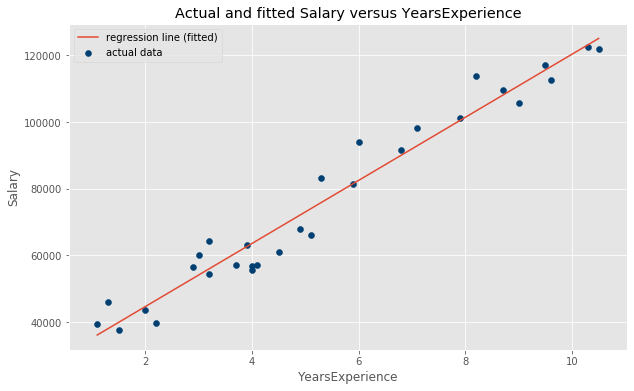

In [7]:
style.use('ggplot')

fig = plt.figure(figsize=(10, 6))

plt.title('Actual and fitted Salary versus YearsExperience')

plt.xlabel("YearsExperience")
plt.ylabel("Salary")

plt.plot(xs, regression_line, label='regression line (fitted)')
plt.scatter(xs,ys,color='#003F72',label='actual data')

plt.legend(loc="upper left")

# Display Actual and fitted Salary versus YearsExperience
plt.show()

## Look at the similarity of this graph with the GRETL graph.  See (Link # 8, Page # 2)
![title](http://www.mikojulj4.com/mab_usb/CH01/rbc2.gif)